# 2.1 Car Price Intro

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 2.2 Data Preparation

In [2]:
df = pd.read_csv('/workspaces/ml_zoomcamp/02-regression/data.csv')

In [3]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [6]:
str_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
for col in str_columns:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory Data Analysis

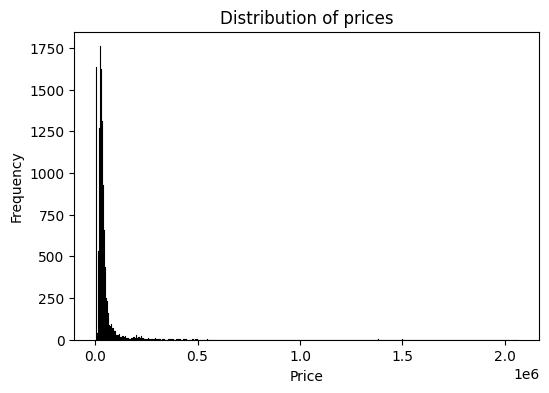

In [9]:
plt.figure(figsize=(6,4))

sns.histplot(df.msrp, bins=400, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print("")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Distribution of Price

<Axes: xlabel='msrp', ylabel='Count'>

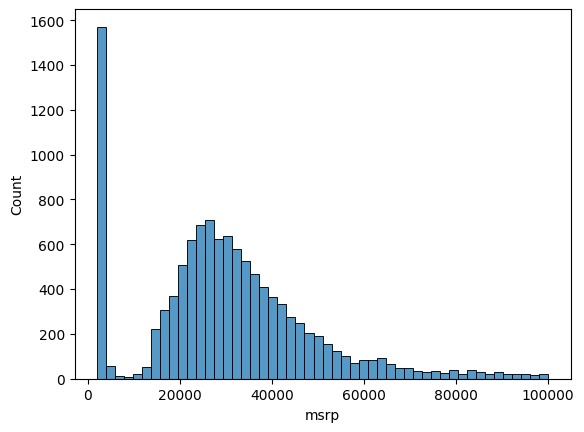

In [11]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [12]:
np.log1p([0,1,10,100,1000,1000000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       13.81551156])

In [13]:
price_log = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

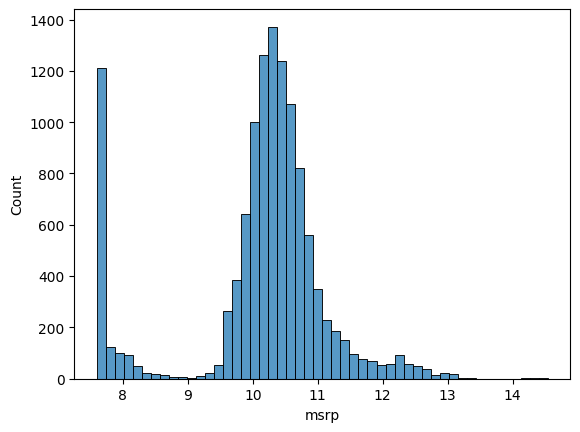

In [14]:
sns.histplot(price_log, bins=50)

### Missing Values

In [15]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up validation framework

split data into Train, validation, test sets -- Xt,yt; Xv,yv; Xtest,ytest

Train - 60%; Validation - 20%, Test - 20%

In [16]:
n = len(df)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = int(n * .6)

In [17]:
# Check to see if no records were left behind during rounding by int
n,n_val+n_test+n_train

(11914, 11912)

In [18]:
# Missing two records, how do we fix?
# Remove n_val and n_test and whatever remains will be n_train
n = len(df)
n_val = int(n * .2)
n_test = int(n * .2)
n_train = n - n_val - n_test
# Check to see if no records were left behind during rounding by int
n,n_val+n_test+n_train

(11914, 11914)

In [19]:
# Now they are the same, good
n_val,n_test,n_train

(2382, 2382, 7150)

In [20]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [21]:
# How to shuffle
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913], shape=(11914,))

In [22]:
np.random.seed(2)
np.random.shuffle(idx)

In [23]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [24]:
# Now idx is shuffled index
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [25]:
df_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [26]:
df_val.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595


In [27]:
df_test.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [28]:
# Sanity check length
len(df_train),len(df_test),len(df_val)

(7150, 2382, 2382)

In [29]:
# Extract y_train,y_test,y_val
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [30]:
# Remove target column from data so we don't accidentally use it
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [31]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
10498,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
1880,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
5549,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
4146,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
6337,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


## 2.5 Linear Regression

In [32]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 7557, dtype: object

In [33]:
# Taking engine_hp, city_mpg, popularity...
# This is our feature matrix
xi = [453,11,86]

In [34]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [35]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred += w[j]*xi[j]
        
    return pred

In [36]:
ans = linear_regression(xi)

In [37]:
np.expm1(ans)

np.float64(222347.2221101062)

## 2.6 Linear Regression Form

In [38]:
# Will generalize to vector form
def dot(xi,w):
    n = len(xi)
    res = 0
    for j in range(n):
        res += xi[j] * w[j]
    return res
'''This uses a for loop, realizing we can use a dot product, we take an initial bias w0 and add it to the dot product of a car's features
and their weights, giving us the below:'''


"This uses a for loop, realizing we can use a dot product, we take an initial bias w0 and add it to the dot product of a car's features\nand their weights, giving us the below:"

In [39]:
def linear_regression(xi):  
    return w0 + dot(xi,w)
''' We can make this even cleaner by merging w0 with the other weights, but we need to add a 1 at x0 for equality, so first we prepend w0
and call it w_new'''

' We can make this even cleaner by merging w0 with the other weights, but we need to add a 1 at x0 for equality, so first we prepend w0\nand call it w_new'

In [40]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [41]:
''' Now we can consolidate the return to a dot product by adding 1 to the beginning of xi array'''
def linear_regression(xi):  
    xi = [1] + xi
    return dot(xi,w_new)

In [42]:
'''This worked, but only for one row, or one car in this example.  Next step is to expand xi to X (matrix)'''
linear_regression(xi)

12.312

In [43]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [44]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [45]:
'''Here we add more rows, with the 1's included at x0, then make a numpy array out of it'''
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x3 = [1,453,11,86]

In [46]:
X = [x1,x2,x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [47]:
''' Now we recognize that linear regression is simply the dot product of the feature matrix with 1's added at column 0 with w_new'''
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [48]:
'''Modifying the function to account for the changes:'''
def linear_regression(X):
    return X.dot(w_new) # Matrix-vector multiplication!

In [49]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

w = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y

In [50]:
def train_linear_regression(X,y):
    pass


In [69]:
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [70]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [86]:
X = np.column_stack([ones,X])
X

array([[1.000e+00, 1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [87]:
XTX = X.T.dot(X) #GRAM Matrix

In [73]:
XTX_inv = np.linalg.inv(XTX)

In [54]:
XTX.dot(XTX_inv)

array([[ 1.00000000e+00, -1.95495204e-18,  6.28430684e-17,
         1.75822864e-18],
       [-9.06380006e-14,  1.00000000e+00,  6.18373354e-15,
         5.01606559e-17],
       [-1.90098479e-13,  7.34292862e-18,  1.00000000e+00,
         2.74699667e-17],
       [-3.38086980e-13, -7.69365108e-16,  1.45868899e-14,
         1.00000000e+00]])

In [79]:
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [80]:
w_full = XTX_inv.dot(X.T).dot(y)

In [81]:
w0 = w_full[0]
w = w_full[1:]

In [82]:
w0,w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [84]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0],w_full[1:]

In [88]:
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,185],
    [172,25,201],
    [413,11,86],
    [38,54,185],
    [142,25,431],
    [453,31,86],
]
X = np.array(X)
y = [10000,20000,15000,20050,10000,20000,15000,25000,12000]

In [89]:
train_linear_regression(X,y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In [117]:
# g(X) = y
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [118]:
# use some numerical type columns
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']


In [119]:
X_train = df_train[base].values
X_train.shape

(7150, 5)

In [120]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))